#########################################################################
## Introduction to Engineering Data Analytics with Python
## Case Study: Documentation
### By:
### Amrullah Abdul Qadir
### Arkadeep Dutta
### Despoina Karkani
### Goutham Baburaj
#########################################################################

# Table of Contents
* [1. Introduction](#introduction)
* [2. Data Preparation](#data-preparation)
    * [2.1 Program Preparation](#program-preparation)
    * [2.2 Data Import](#data-import)
    * [2.3 Data Cleaning](#data-cleaning)
        * [2.3.1 Cleaning](#cleaning)
        * [2.3.2 Standardization](#standardization)
        * [2.3.3 Classification](#classification)
        * [2.3.4 Combination](#combination)
* [3. Evaluation](#evaluation)
    * [3.1 Relative Frequency Analysis](#relative-frequency-analysis)
    * [3.2 P-Chart Calculations](#p-chart-calculations)
    * [3.3 Pareto Analysis](#pareto-analysis)
* [4. Results and Conclusions](#results-and-conclusions)
    * [4.1 Results](#results)
        * [4.1.1 Relative Frequency Results](#relative-frequency-results)
        * [4.1.2 P-Chart Results](#p-chart-results)
        * [4.1.3 Pareto Analysis Results](#pareto-analysis-results)
    * [4.2 Conclusions](#conclusions)

# 1. Introduction

This documentation is prepared by the Complete Vehicle Quality department of the OEM Group. The purpose is to investigate the feasibility of supplier inspections based on the volumes of defective component products. The feasibility study to decide whether supplier inspections are required. The feasibility study will be carried out using data analysis of the components data provided by the supplier.  

The data to be analyzed contains the components information from the suppliers. The data contains the following: 
- types of components 
- part number (ID)
- production date (Produktionsdatum)
- supplier code (Herstellernummer)
- factory code (Werksnummer)
- failure status (Fehlerhaft)
- failure date (Fehlerhaft Datum)
- failure mileage (Fehlerhaft Fahrleistung)

The inspection feasibility study requires that the following is investigated in the data analysis:
- factory-based annual relative frequency volumes of defective components
- product groups that dominates the volume of defective components

The analysis results will be used to decide whether inspections, process or comprehensive, will be required.

# 2. Data Preparation

## 2.1 Program Preparation

Data analysis is conducted using Python with Pandas data tools and Dash as the data visualizer. In the code below, required packages are imported into Python to assist with the data analysis.

In [242]:
# importing required packages for the data analysis
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

## 2.2 Data Import
The components data provided are compiled in 2 version, one in comma separated value files (CSV), and another one is a text file format (TXT). CSV files are well compiled and can be imported readily, while the TXT files, albeit well organized, cannot be directly imported without some manipulation to the way the files are organized. Direct import of the TXT files will not result in a well arranged dataframe like the one in the CSV files. 

Therefore, the steps taken before importing the TXT data files is to perform some manipulations on the files. The TXT files use white space and vertical tab character () to separate the data vertically between each entry. As for column separation, double 'I' letters (II), vertical bar (|), double backslashes (\\), and whitespace are used. The TXT files are first opened and loaded into Python. The contents are then read and the characters above are replaced with newline command (\n) for vertical separation and replaced with comma for column separation. The files are then saved as separate CSV files with similar filenames. This is to avoid modifying the original data files.

In [243]:
# function to read txt data files and convert them to proper csv files:
# - txt_file: input filename (including directory if applicable)
# - csv_file: output filename (including directory if applicable)
# - vtab: vertical tab character () in the original file (to be replaced 
#   with newline command '\n')
# - delim: delimiter character used in the original file (to be replaced 
#   with comma) 

def txt_to_csv(txt_file, csv_file, vtab, delim):
    with open(txt_file, 'r') as file:
        data = file.read().replace(vtab, '\n').replace(delim, ',')
    with open(csv_file, 'w') as file:
        file.write(data)    
    return

The selected data files to be analyzed are shown in the code snippet below. The files are stored in the the 'Komponente' folder in the Data directory. Each data files are assigned as variables based on the filenames and extensions. For example, TXT file containing the data on components K2LE1 is assigned to variable 'K2LE1_txt'. The files with '.txt' extensions are first converted to '.csv' based on the process explained earlier.

In [244]:
# original filename and directory for txt data files
K1DI2_txt = './Data/Komponente/Komponente_K1DI2.txt'
K2LE1_txt = './Data/Komponente/Komponente_K2LE1.txt' 
K2LE2_txt = './Data/Komponente/Komponente_K2LE2.txt'
K2ST1_txt = './Data/Komponente/Komponente_K2ST1.txt'
K3AG2_txt = './Data/Komponente/Komponente_K3AG2.txt'
K7_txt    = './Data/Komponente/Komponente_K7.txt'

# converted txt filename and directory
K1DI2_csv = './Data/Komponente/Komponente_K1DI2.csv'
K2LE1_csv = './Data/Komponente/Komponente_K2LE1.csv'
K2LE2_csv = './Data/Komponente/Komponente_K2LE2.csv'
K2ST1_csv = './Data/Komponente/Komponente_K2ST1.csv'
K3AG2_csv = './Data/Komponente/Komponente_K3AG2.csv'
K7_csv    = './Data/Komponente/Komponente_K7.csv'

# original filename and directory for csv data files
# component data files
K1BE1_csv = './Data/Komponente/Komponente_K1BE1.csv'
K1BE2_csv = './Data/Komponente/Komponente_K1BE2.csv'
K1DI1_csv = './Data/Komponente/Komponente_K1DI1.csv'
K2ST2_csv = './Data/Komponente/Komponente_K2ST2.csv'
K3AG1_csv = './Data/Komponente/Komponente_K3AG1.csv'
K3SG1_csv = './Data/Komponente/Komponente_K3SG1.csv'
K3SG2_csv = './Data/Komponente/Komponente_K3SG2.csv'
K4_csv    = './Data/Komponente/Komponente_K4.csv'
K5_csv    = './Data/Komponente/Komponente_K5.csv'
K6_csv    = './Data/Komponente/Komponente_K6.csv'    

In [245]:
# read and convert all the txt data files to csv
txt_to_csv(K1DI2_txt, K1DI2_csv, '	', '\\')
txt_to_csv(K2LE1_txt, K2LE1_csv, '', 'II')
txt_to_csv(K2LE2_txt, K2LE2_csv, '', '\\')
txt_to_csv(K2ST1_txt, K2ST1_csv, '', '|')
txt_to_csv(K3AG2_txt, K3AG2_csv, '', '\\')
txt_to_csv(K7_txt   , K7_csv   , '', '	')

The imported files are not readily organized, even if it is converted to CSV format with proper horizontal and vertical separation. It turns out that some of the data files contains more than one columns of the same name, shown by the '.x' and '.y' suffixes on each column. 

The duplicated colums are arranged in such a way that they are misaligned with the original columns. The duplicated columns also do not have any data entries that are in the same rows as the orignal columns. At this point, we can assume that all the data, in the duplicated columns or not, are equally important. To tackle this problem, the files are classified into four types of column duplication, namely A, B, C, and D. The details of each column types can be seen in the code snippet below.

A function is then created to read the csv data files based on the types of duplication and delimiter, if applicable (some csv data files still contain non-comma delimiter). The imported data is then stored as Pandas dataframes with variable name based on the components name. For example, component K1DI2 was imported from data file that is assigned as K1DI2_csv. The imported data, in the form of Pandas dataframe is stored as variable named K1DI2.  

In [246]:
# separate the data arrangements into 4 types, namely A, B, C, and D. 
# this separation is based on the column names of the datetime data type
A = ['Fehlerhaft_Datum', 'origin']
B = ['Produktionsdatum.x', 'Fehlerhaft_Datum.x', 
     'Produktionsdatum.y', 'Fehlerhaft_Datum.y']
C = ['Produktionsdatum.x', 'Fehlerhaft_Datum.x', 
     'Produktionsdatum.y', 'Fehlerhaft_Datum.y', 
     'Produktionsdatum', 'Fehlerhaft_Datum']
D = ['Produktionsdatum', 'Fehlerhaft_Datum']

# set up a function to read the csv files
def csv_reader(csv_file, arr_type, delim=None):
    if delim is not None:
        dataset = pd.read_csv(csv_file, parse_dates=arr_type, 
                          low_memory=False, sep=delim)
    else:
        dataset = pd.read_csv(csv_file, parse_dates=arr_type, 
                          low_memory=False)
    return dataset

# read the converted csv files using the csv_reader function
K1DI2 = csv_reader(K1DI2_csv, A)
K2LE1 = csv_reader(K2LE1_csv, B)
K2LE2 = csv_reader(K2LE2_csv, A)
K2ST1 = csv_reader(K2ST1_csv, D)
K3AG2 = csv_reader(K3AG2_csv, A)
K7    = csv_reader(K7_csv, A)

# read the rest of the csv files using the csv_reader function
K1BE1 = csv_reader(K1BE1_csv, A)
K1BE2 = csv_reader(K1BE2_csv, A, ';')
K1DI1 = csv_reader(K1DI1_csv, C)
K2ST2 = csv_reader(K2ST2_csv, A, ';')
K3AG1 = csv_reader(K3AG1_csv, C)
K3SG1 = csv_reader(K3SG1_csv, B)
K3SG2 = csv_reader(K3SG2_csv, A)
K4    = csv_reader(K4_csv,    B, ';')
K5    = csv_reader(K5_csv,    B)
K6    = csv_reader(K6_csv,    A, ';')

## 2.3 Data Cleaning
### 2.3.1 Cleaning

With all the datasets imported, we proceed to the data cleaning process. As mentioned in the previous section, the dataset has different arrangements due to duplicate columns occurred in the data files. Datasets with columns duplication type B and C requires additional processing to consolidate all the data into one column of each types and eliminate duplicate columns.

For datasets that are categorized as type B, they are separated into two distict datasets, and added to them suffixes '_x' and '_y'. Whereas for type C datasets, they are separated into three distict datasets, two with suffixes '_x' and '_y', and the remaining one left intact (with added underscore as suffix). The datasets with suffixes are treated separately, albeit the same process. The column names are changed, eliminating the '.x' and '.y' suffixes, and the X1 and unnamed columns are removed. The datasets, having all the columns renamed, is then concatenated to form the original dataset without the duplicate columns and the variable names are added suffix '_c' to indicate that the particular component dataset is clean.

For consistency, the removal of the X1 and unnamed columns (if present) are also removed in the datasets other than type B and C. The files are also renamed by adding the suffix '_c'. This however, is not done to all the components datasets, since some of them requires further processing before ready to use.

In [247]:
# column names to be renamed for type B
col_names_x = {'Produktionsdatum.x':'Produktionsdatum', 
               'Herstellernummer.x':'Herstellernummer',	
               'Werksnummer.x':'Werksnummer',
               'Fehlerhaft.x':'Fehlerhaft', 
               'Fehlerhaft_Datum.x':'Fehlerhaft_Datum',
               'Fehlerhaft_Fahrleistung.x':'Fehlerhaft_Fahrleistung'}
col_names_y = {'Produktionsdatum.y':'Produktionsdatum', 
               'Herstellernummer.y':'Herstellernummer',	
               'Werksnummer.y':'Werksnummer',
               'Fehlerhaft.y':'Fehlerhaft', 
               'Fehlerhaft_Datum.y':'Fehlerhaft_Datum',
               'Fehlerhaft_Fahrleistung.y':'Fehlerhaft_Fahrleistung'}

# set up variables for the components. The components are engine (Motor), 
# electrical components (Schaltung),
# body components (Karosserie), and seats (Sitze)
id_motor   = 'ID_Motor'             ; id_schaltung   = 'ID_Schaltung'
id_motor_x = 'ID_Motor.x'           ; id_schaltung_x = 'ID_Schaltung.x'
id_motor_y = 'ID_Motor.y'           ; id_schaltung_y = 'ID_Schaltung.y'

id_karosserie   = 'ID_Karosserie'   ; id_sitze   = 'ID_Sitze'
id_karosserie_x = 'ID_Karosserie.x' ; id_sitze_x = 'ID_Sitze.x' 
id_karosserie_y = 'ID_Karosserie.y' ; id_sitze_y = 'ID_Sitze.y'

# separate type B tables based on the suffixes, rename the columns, and 
# concatenate vertically, and finally extract the columns that contain 
# the data. # the cleaned up dataset is added with suffix '_c'
def streamline_type_B(dataset, col_x, col_y, ID, ID_x, ID_y):
    dataset_x = dataset[dataset[ID_x].notna()].rename(columns=col_x)
    dataset_y = dataset[dataset[ID_y].notna()].rename(columns=col_y)
    dataset_x = dataset_x.rename(columns={ID_x : ID})
    dataset_y = dataset_y.rename(columns={ID_y : ID})
    dataset_x = dataset_x.loc[:, ID:'Fehlerhaft_Fahrleistung']
    dataset_y = dataset_y.loc[:, ID:'Fehlerhaft_Fahrleistung']
    dataset_c = pd.concat([dataset_x, dataset_y], axis=0).reset_index(
                drop=True)
    return dataset_c

K2LE1_c = streamline_type_B(K2LE1, col_names_x, col_names_y, 
                            id_sitze, id_sitze_x, id_sitze_y)
K3SG1_c = streamline_type_B(K3SG1, col_names_x, col_names_y, 
                            id_schaltung, id_schaltung_x, id_schaltung_y)
K4_c    = streamline_type_B(K4, col_names_x, col_names_y, 
                            id_karosserie, 
                            id_karosserie_x, 
                            id_karosserie_y)
K5_c    = streamline_type_B(K5, col_names_x, col_names_y, 
                            id_karosserie, 
                            id_karosserie_x, 
                            id_karosserie_y)

# separate type C tables based on the suffixes, rename the columns, and 
# concatenate vertically, and finally extract the columns that contain 
# the data. the cleaned up dataset is added with suffix '_c'
def streamline_type_C(dataset, col_x, col_y, ID, ID_x, ID_y):
    dataset_x = dataset[
                    dataset[ID_x].notna()].loc[
                             :, ID_x:'Fehlerhaft_Fahrleistung.x'].rename(
                                    columns=col_x)
    dataset_y = dataset[dataset[ID_y].notna()].loc[
                             :, ID_y:'Fehlerhaft_Fahrleistung.y'].rename(
                                    columns=col_y)
    dataset_  = dataset[dataset[ID].notna()]
    dataset_x = dataset_x.rename(columns={ID_x : ID})
    dataset_y = dataset_y.rename(columns={ID_y : ID})
    dataset_  = dataset_.loc[:, ID:'Fehlerhaft_Fahrleistung']    
    dataset_c = pd.concat([dataset_x, 
                           dataset_y, 
                           dataset_], axis=0).reset_index(drop=True)
    return dataset_c

K1DI1_c = streamline_type_C(K1DI1, col_names_x, col_names_y,
                          id_motor, id_motor_x, id_motor_y)
K3AG1_c = streamline_type_C(K3AG1, col_names_x, col_names_y,
                          id_schaltung, id_schaltung_x, id_schaltung_y)

# eliminate the X1 column (the left most column after index)
K2ST1_c = K2ST1.loc[:, id_sitze:'Fehlerhaft_Fahrleistung']

### 2.3.2 Standardization

After all the datasets have been cleaned, now we take a look at them. Some of the components datasets have different ways of presenting the production dates. Some engine components for example, the production dates are presented in the form of number of days after first production, which is January 1st, 1970. Therefore, a standard of how the datasets are presented need to be devised. This is where the standardization comes in.

The standardized dataset columns consist of part number, production date, supplier code, factory code, failure status, failure date, and failure mileage. The datasets mentioned in the above paragraph did not have production date, instead the production time information is presented in the form of days and first production date. In order for them to be able to be included into the ready-to-process datasets, the production time information will need to be converted to standard production dates like in the rest of the datasets. This is done with the functions created in the code snippet below.

In [248]:
# create function to convert the produktionsdatum_Origin to and origin to 
# standard Produktionsdatum in the other datasets
def add_produktions_datum(dataset):
    origin    = dataset['origin']
    timedelta = pd.to_timedelta(dataset[
                              'Produktionsdatum_Origin_01011970'].astype(
                                  'int'), unit='days')
    dataset['Produktionsdatum'] = origin + timedelta
    return dataset

# create function that converts the column arrangements in the dataset to 
# show the ID, Produktionsdatum, Herstellernummer, Werksnummer, Fehlerhaft,
# Fehlerhaft_Datum, and Fehlerhaft_Fahrleistung. This will be the standard
# column layout
def reformat_dataset(dataset, ID):
    dataset_c = pd.concat([dataset.loc[:,ID], 
                    dataset.loc[
                        :,'Produktionsdatum'], 
                    dataset.loc[
                        :,'Herstellernummer':'Fehlerhaft_Fahrleistung']],
                          axis=1)
    return dataset_c

K1BE1_c = reformat_dataset(add_produktions_datum(K1BE1), id_motor)
K1BE2_c = reformat_dataset(add_produktions_datum(K1BE2), id_motor)
K1DI2_c = reformat_dataset(add_produktions_datum(K1DI2), id_motor)
K2LE2_c = reformat_dataset(add_produktions_datum(K2LE2), id_sitze)
K2ST2_c = reformat_dataset(add_produktions_datum(K2ST2), id_sitze)
K3AG2_c = reformat_dataset(add_produktions_datum(K3AG2), id_schaltung)
K3SG2_c = reformat_dataset(add_produktions_datum(K3SG2), id_schaltung)
K6_c    = reformat_dataset(add_produktions_datum(K6), id_karosserie)
K7_c    = reformat_dataset(add_produktions_datum(K7), id_karosserie)

### 2.3.3 Classification

The cleaned and standardized datasets are then classified based on its type. For example, the engine components is added into the list variable called 'motor_list', the electrical components is added into the list variable called 'schaltung_list', and so on. The names of each component are also classified into their respective name lists. This is done in case the analysis requires component type-based classified information. 

Before all the components are combined into a single, cleaned, dataset, a scan for duplicate data entries are carried out in all the datasets. After the duplicate entries are removed, the datasets are then added a column containing the komponents name.Then it's ready to be combined.

In [249]:
# classify the components into list based on the types of components 
# (Motor, Sitze, Schaltung, and Karosserie)
motor_list      = [K1BE1_c, K1BE2_c, K1DI1_c, K1DI2_c]
sitze_list      = [K2LE1_c, K2LE2_c, K2ST1_c, K2ST2_c]
schaltung_list  = [K3AG1_c, K3AG2_c, K3SG1_c, K3SG2_c]
karosserie_list = [K4_c, K5_c, K6_c, K7_c]

motor_name      = ['K1BE1', 'K1BE2', 'K1DI1', 'K1DI2']
sitze_name      = ['K2LE1', 'K2LE2', 'K2ST1', 'K2ST2']
schaltung_name  = ['K3AG1', 'K3AG2', 'K3SG1', 'K3SG2']
karosserie_name = ['K4'   , 'K5'   , 'K6'   , 'K7'   ]

# checks for duplicates in the components datalists and drop them 
# if present
def drop_duplicates(dataset_list):
    for i in range(len(dataset_list)):
        dataset_list[i] = dataset_list[i].drop_duplicates()
        dataset_list[i] = dataset_list[i].reset_index(drop=True)
    return dataset_list

motor_list      = drop_duplicates(motor_list)
sitze_list      = drop_duplicates(sitze_list)
schaltung_list  = drop_duplicates(schaltung_list)
karosserie_list = drop_duplicates(karosserie_list)

In [250]:
# create a function to add a column that contains the 
# components name
def add_komponentenname(komponente_list, ID):
    if (ID == id_motor) | (ID == id_sitze) | (ID == id_schaltung):
        data            = {'Komp_Name':komponente_list[ID].str[:5]}
        komponentenname = pd.DataFrame(data)
        komponente_addname = pd.concat([komponentenname,
                komponente_list.loc[:,
                'Produktionsdatum':'Fehlerhaft_Fahrleistung']],
                                        axis=1)
        komponente_addname = pd.concat([komponente_list[ID],
                                        komponente_addname],
                                        axis=1)
    else: 
        if ID == id_karosserie:
            # cols =[{'Produktionsdatum':'Fehlerhaft_Fahrleistung'}]
            data = {'Komp_Name':komponente_list[ID].str[:2]}
            komponentenname = pd.DataFrame(data)
            komponente_addname = pd.concat([komponentenname,
                    komponente_list.loc[:,
                    'Produktionsdatum':'Fehlerhaft_Fahrleistung']],
                                        axis=1)
            komponente_addname = pd.concat([komponente_list[ID],
                                            komponente_addname],
                                            axis=1)
    return komponente_addname

# apply the function to the components in the list
for i in range(0, 4):
    motor_list[i]      = add_komponentenname(motor_list[i], 
                                             id_motor)
    sitze_list[i]      = add_komponentenname(sitze_list[i], 
                                             id_sitze)
    schaltung_list[i]  = add_komponentenname(schaltung_list[i], 
                                             id_schaltung)
    karosserie_list[i] = add_komponentenname(karosserie_list[i], 
                                             id_karosserie)

### 2.3.4 Combination

Now, after the datasets that contains all the components information are processed and cleaned, its time to combine all of them into a single standardized and clean dataset. As mentioned in the previous sections, the standard columns consist of part number, date of production, supplier code, factory code, failure status, failure date, and failure mileage. First, we concatenate all the components of the same type and then concatenate all the components together. 

The engine datasets list 'motor_list' for example, contains lists of engine dataset. Before concenanting all the components dataset, we first concatenate the components dataset lists inside the components list. Then when all the components datasets are merged, then we combine all the different components dataset into one single dataset. After the single main dataset is created, the columns that contain the integer data such as supplier code, factory code, and failure status is set as integer. This is done due to some of the columns are formatted as string. This will remove the ambiguity of the data types later when we start doing the analysis.

Finally, we reset the index of the main dataset and saved them into the final dataset csv file. This csv file is stored in the same directory as the Python code file.

In [251]:
# create a function to concatenate the datasets of each component type, 
# merge the component dataset with the vehicle dataset, and rename the 
# ID columns of all the dataset.
def concat_dataset(dataset_list, id):
    for i in (1, len(dataset_list) - 1):
        datasetList_all = pd.concat([dataset_list[0], dataset_list[i]], 
                                    axis=0)
        dataset_list[0]  = datasetList_all
    datasetList_all = datasetList_all.rename(columns={id:'ID'})
    return datasetList_all

# concatenate the components based on type
motor_list_all      = concat_dataset(motor_list, id_motor)
sitze_list_all      = concat_dataset(sitze_list, id_sitze)
schaltung_list_all  = concat_dataset(schaltung_list, id_schaltung)
karosserie_list_all = concat_dataset(karosserie_list, id_karosserie)

# concatenate all the components into a single dataset
komponente_all = pd.concat([motor_list_all,
                            sitze_list_all,
                            schaltung_list_all,
                            karosserie_list_all], axis=0, join='inner')

# set the Herstellernummer, Werksnummer, and Fehlerhaft columns as int
int_col = ['Herstellernummer','Werksnummer','Fehlerhaft']
komponente_all[int_col] = komponente_all[int_col].astype('int')

# reset index
komponente_all = komponente_all.reset_index(drop=True)

# save the cleaned file to the final dataset
komponente_all.to_csv('Final_dataset_group_33.csv')
komponente_all.head()

,ID,Komp_Name,Produktionsdatum,Herstellernummer,Werksnummer,Fehlerhaft,Fehlerhaft_Datum,Fehlerhaft_Fahrleistung
0,K1BE1-101-1011-7,K1BE1,2008-11-12,101,1011,0,NaT,0.0
1,K1BE1-101-1011-12,K1BE1,2008-11-13,101,1011,0,NaT,0.0
2,K1BE1-101-1011-90,K1BE1,2008-11-13,101,1011,0,NaT,0.0
3,K1BE1-101-1011-2,K1BE1,2008-11-12,101,1011,0,NaT,0.0
4,K1BE1-101-1011-8,K1BE1,2008-11-13,101,1011,0,NaT,0.0


# 3. Evaluation

The feasibility study requirements are as the following:
1. Relative frequency of defective components supplied by each factory
2. Product Groups where defective volumes are dominant

With the final single dataset of all components ready, we can start evaluating the requirements of the feasibility study stated above.

## 3.1 Relative Frequency Analysis

First, we list the plants, calculate the annual volumes, calculate the defective components' annual volumes produced by the plants, and calculate its relative frequency. Relative frequency is the ratio of defective components to the total number of components produced. It can be calculated using the following formula:

$$ f_\text{relative} = \frac{n_\text{defects}}{n_\text{total}}$$

where:
- $f_\text{relative}$ is the relative frequency
- $n_\text{failure}$ is the number of defects produced
- $n_\text{total}$ is the total number of components produced

In the context of this study, the relative frequencies are calculated as the volume of defective components produced annually in a supplier factory divided by the total volumes of components produced by the said supplier factory. In the code below, a list of supplier factory is generated based on the factory codes. Then we create a list of of production year based on the production date in the dataset. The dataset contains information on components produced from 2008 until 2016.

The 'plant_list', which contains the factory code, along with the list of production year, is fed into a loop that calculates the annual relative frequency and relative frequency percentage (relative frequency multiplied by 100) for each factory. The resulting dataset is the annual relative frequency of each plant.

In [252]:
# find the number of plants that produce the components and 
# make a list of plants
plant_list = komponente_all['Werksnummer'].unique()

# set the production year
production_year = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

# calculate the relative frequency
plant_prod  = []
for year in production_year:
    for plant in plant_list:
        total_volume  = komponente_all.loc[
                        (komponente_all['Werksnummer'] == plant)
                      & (komponente_all[
                         'Produktionsdatum'].dt.year == year)].shape[0]
        defect_volume = komponente_all[
                        (komponente_all['Werksnummer'] == plant)
                      & (komponente_all[
                          'Produktionsdatum'].dt.year == year)
                      & (komponente_all['Fehlerhaft'] == 1)].shape[0]
        if (total_volume != 0) & (defect_volume != 0):
            relative_freq = defect_volume / total_volume
            relative_freq_percentage = relative_freq * 100
        else: 
            relative_freq = 0
            relative_freq_percentage = 0
        plant_prod.append([year, plant, total_volume, defect_volume, 
                          relative_freq, relative_freq_percentage])

plant_list_rel_freq = pd.DataFrame(plant_prod,
                                   columns=['year', 'werksnummer',
                                            'total_volume', 
                                            'defect_volume',
                                            'relative_freq', 
                                            'relative_freq_percentage'])

After we obtain the relative frequency datasets for all factories and all years, we noticed that some of the factories are not producing during all the years. Some are only producing components for three year (factory 1101 only in production from 2013 until 2016), while another factory only supply components for four years (factory 1141 in production from 2008 until 2012).

To prepare the relative frequency datasets for visualization, we will need to remove the rows where the production volumes are zero. This is to prevent the charts from showing zeros which in the case of line charts will mess the overall line plots. In the code snippet below, the factory code variables is given as 'plant list assignment' for guidance to which factory code in the 'plant' list position belongs to. For example, in list position 'plant[3]', the factory code is 1031, which means the dataset in that list position belongs to supplier factory 1031.

In [253]:
# distribute the annual volumentric relative frequency dataset to its 
# respective plant name
def distribute_plant_stat(plant, plant_list_rel_freq, plant_list):
        for i in range(len(plant_list)):
                plant.append(plant_list_rel_freq[
                    plant_list_rel_freq['werksnummer'] 
                                              == plant_list[i]])
        # plant = plant.reset_index(drop=True)
        return plant
plant = []
plant = distribute_plant_stat(plant, plant_list_rel_freq, plant_list)

# filter the plant tables to remove the rows where the total volumes and 
# defective volumes are zero
for i in range(len(plant)):
        plant[i] = plant[i][(plant[i]['total_volume'] != 0) 
                            & (plant[i]['total_volume'] != 0)]

# for reference, the plant list assignment is as the following:
plant1011 = plant[0];  plant1041 = plant[1];  plant1021 = plant[2]; 
plant1031 = plant[3];  plant1091 = plant[4];  plant1111 = plant[5]; 
plant1092 = plant[6];  plant1101 = plant[7];  plant1051 = plant[8]; 
plant1061 = plant[9];  plant1082 = plant[10]; plant1081 = plant[11]; 
plant1072 = plant[12]; plant1121 = plant[13]; plant1141 = plant[14]; 
plant1122 = plant[15]; plant1131 = plant[16]; plant1142 = plant[17]; 
plant1132 = plant[18]

## 3.2 P-Chart Calculations

In section 3.1, we calculate the relative frequency of factory the annual production defect. In this section, we will go further and calculate the upper and lower control limit of each factory production. This is known as P-Chart analysis. 

P-Chart analysis is a tool used to check if the production processes has not deviated much from the set upper and lower limit of the relative frequency. If the defective relative frequency is within the control limit, we can be sure that the production has not run into problems or potential problems. In this calculation, the upper and lower control limits are calculated using the following formula:

$$\text{UCL}_p = \hat{p} + z \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}$$

$$\text{LCL}_p = \hat{p} - z \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}$$

where:
- $\hat{p}$ is the mean relative frequency
- $\text{UCL}_p$ is the upper control limit
- $\text{LCL}_p$ is the lower control limit

The code snippet below performs P-Chart parameters calculation, finding annual the upper and lower control limits of each factory. If the lower control limit is negative, the value is set to zero as lower control limit cannot be negative.

In [254]:
# create a function to calculate the upper and lower control limits of 
# the production defects of all the components' supplier factories
def pchart_calculation(plant_no):
    pchart_contro_limit        = pd.DataFrame(columns=['p','ucl','lcl'])
    pchart_contro_limit['p']   = plant_no['relative_freq']
    pBar                     = pchart_contro_limit['p'].mean()
    for i in pchart_contro_limit.index:
        pchart_contro_limit['ucl'] = pBar + 3 * np.sqrt(
                                              (pBar * (1 - pBar)) 
                                              / plant_no['total_volume'])
        pchart_contro_limit['lcl'] = pBar - 3 * np.sqrt(
                                              (pBar * (1 - pBar)) 
                                              / plant_no['total_volume'])
        if pchart_contro_limit['lcl'][i] < 0:
            pchart_contro_limit['lcl'][i] = 0
    return pchart_contro_limit

plant_control_limit = []
for i in range(len(plant)):
    plant_control_limit.append(pchart_calculation(plant[i]))


## 3.3 Pareto Analysis
The 80/20 rule, which is known as the Pareto Principle, states that 80% of the outcomes come from 20% of the causes. In this analysis, the largest proportion of components production defects may not be contributed by factory 1111 (which has the highest relative frequency), but by another factories. To find out, we will perform Pareto analysis to check whether factory 1111 is the top producer of defective components.

For Pareto analysis, we need the total defective components volume from each factory. The defective volume is then sorted in descending order. Next, we calculate the cumulative volume of the defective components and the percentage of cumulative defects. The percentage of cumulative defects is calculated by dividing the cumulative defect by the total defective components volume, multiplied by 100.

Next, we plot a bar chart of the defective components volume against the supplier factory. On the same graph, we plot the cumulative percentage curve. Then make a horizontal line at the 80th percentile. The supplier factories that contribute to the most defective components production volume is on the left of the point where the cumulative percentage intersects the horizontal 80th percentile line. The parameters for the Pareto analysis can be seen in the table under the code snippet below.

In [255]:
# using pareto analysis to find out which plants contribute most of the 
# defective components

pareto = plant_list_rel_freq[(plant_list_rel_freq['total_volume'] != 0)]
pareto = pareto[(pareto['defect_volume'] != 0)].loc[:,['werksnummer',
                                                       'defect_volume']]
pareto = pareto.groupby('werksnummer', 
                        as_index=False)['defect_volume'].sum()
pareto = pareto.sort_values(by='defect_volume', 
                            ascending=False).reset_index(drop=True) # type: ignore
pareto['cumulative_defects']    = pareto['defect_volume'].cumsum()
pareto['cumulative_percentage'] = 100 * pareto[
                                        'cumulative_defects'] / pareto[
                                            'defect_volume'].sum()

pareto['werksnummer'] = pareto['werksnummer'].astype('str')

# 4. Results and Conclusions

## 4.1 Results

### 4.1.1 Relative Frequency Results

Result of the relative frequency of the defective components for each supplier factory is presented in this section. The annual overall relative frequency can be seen in the line chart below. The highest volume of defective productions comes from factory code 1111, which is around 20%. The next highest are from factory code 1011 and 1041. The rest of the factories have failure 13% and less, with most of the factories production failure at 10%. The overall relative frequency is 0.123, which is 12% of the total productions of all components in the span of 9 years (2008 - 2016).

By looking at the plot alone, we can infer that the highest failure rate comes from factory 1111. Even in the annual top three factories with the highest defective relative frequency, factory 1111 still comes at the top in every year considered in this analysis. Using the code snippet below, we can check what components is produced in factory 1111. Based on the query, the components with the most defective relative frequency are components K2LE1 and K2LE2, which are seats component. Both seats have defect rate of nearly 20%.

This chart however, has not tell the whole story. Therefore, we will have to look at other analysis performed in this study.

In [294]:
print('Total production volumes of all components:')
print(plant_list_rel_freq['total_volume'].sum())

print('Total defective volumes of all components:')
print(plant_list_rel_freq['defect_volume'].sum())

print('Overall defective relative frequency of all components:')
print(plant_list_rel_freq['defect_volume'].sum() 
      / plant_list_rel_freq['total_volume'].sum())

Total production volumes of all components:
7295016
Total defective volumes of all components:
899950
Overall defective relative frequency of all components:
0.12336504813697462


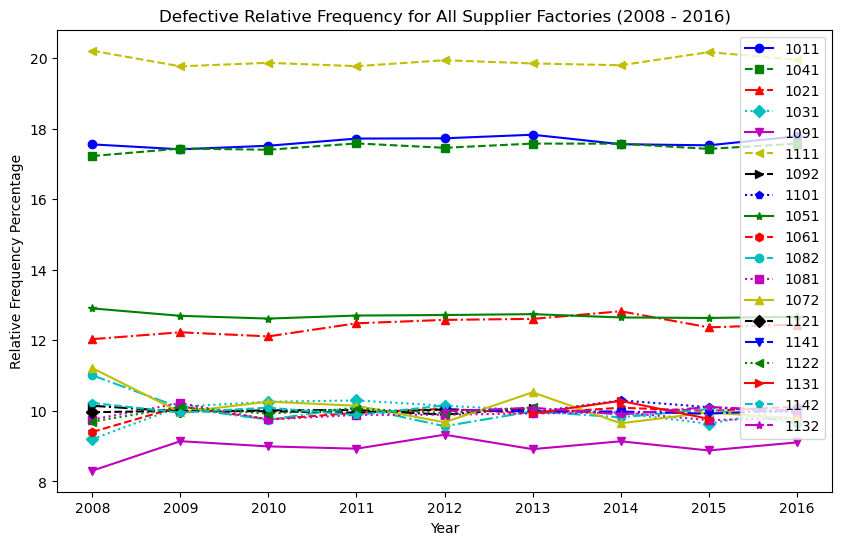

In [257]:
# create lists of markers, colors, and linestyles for quick and efficient
# plot creation
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h',
           'o', 's', '^', 'D', 'v', '<', '>', 'p', '*']
colors  = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g', 'r', 
           'c', 'm', 'y', 'k', 'b', 'g', 'r', 'c', 'm']
lineStyles = ['-', '--', '-.', ':', '-', '--', '-.', ':', 
              '-', '--', '-.', ':', '-', '--', '-.', ':',
              '-', '--', '-.']

plt.figure(figsize=(10,6))
for i in range(len(plant)):
    plt.plot(plant[i]['year'], plant[i]['relative_freq_percentage'],
             marker=markers[i], linestyle=lineStyles[i], color=colors[i], 
             label=str(plant[i]))
plt.legend(plant_list, loc='best')
plt.xlabel('Year')
plt.ylabel('Relative Frequency Percentage')
plt.title('Defective Relative Frequency for All Supplier Factories (2008 - 2016)')
plt.show()

In [256]:
# check for components produced in plant1111
print('Components produced by Factory 1111:')
print(komponente_all[komponente_all['Werksnummer'] 
                     == 1111]['Komp_Name'].unique())

# check for K2LE1
print('Number of components produced for K2LE1:')
print(komponente_all[(komponente_all['Werksnummer'] == 1111) 
                     & (komponente_all['Komp_Name'] == 'K2LE1')].shape[0])

print('Number of defective components produced for K2LE1:')
print(komponente_all[(komponente_all['Werksnummer'] == 1111) 
                     & (komponente_all['Komp_Name'] == 'K2LE1')
                     & (komponente_all['Fehlerhaft'] == 1)].shape[0])

print('Defect relative frequency for K2LE1:')
print((komponente_all[(komponente_all['Werksnummer'] == 1111) 
                     & (komponente_all['Komp_Name'] == 'K2LE1')
                     & (komponente_all['Fehlerhaft'] == 1)].shape[0]) 
                     / (komponente_all[(komponente_all['Werksnummer'] == 1111) 
                     & (komponente_all['Komp_Name'] == 'K2LE1')].shape[0]))

# check for K2LE2
print('Number of components produced for K2LE2:')
print(komponente_all[(komponente_all['Werksnummer'] == 1111) & 
                     (komponente_all['Komp_Name'] == 'K2LE2')].shape[0])

print('Number of defective components produced for K2LE2:')
print(komponente_all[(komponente_all['Werksnummer'] == 1111) 
                     & (komponente_all['Komp_Name'] == 'K2LE2')
                     & (komponente_all['Fehlerhaft'] == 1)].shape[0])

print('Defect relative frequency for K2LE2:')
print((komponente_all[(komponente_all['Werksnummer'] == 1111) 
                     & (komponente_all['Komp_Name'] == 'K2LE2')
                     & (komponente_all['Fehlerhaft'] == 1)].shape[0]) 
                     / (komponente_all[(komponente_all['Werksnummer'] == 1111) & 
                     (komponente_all['Komp_Name'] == 'K2LE2')].shape[0]))

Components produced by Factory 1111:
['K2LE1' 'K2LE2']
Number of components produced for K2LE1:
286232
Number of defective components produced for K2LE1:
57099
Defect relative frequency for K2LE1:
0.19948503311998658
Number of components produced for K2LE2:
98262
Number of defective components produced for K2LE2:
19468
Defect relative frequency for K2LE2:
0.19812338442124117


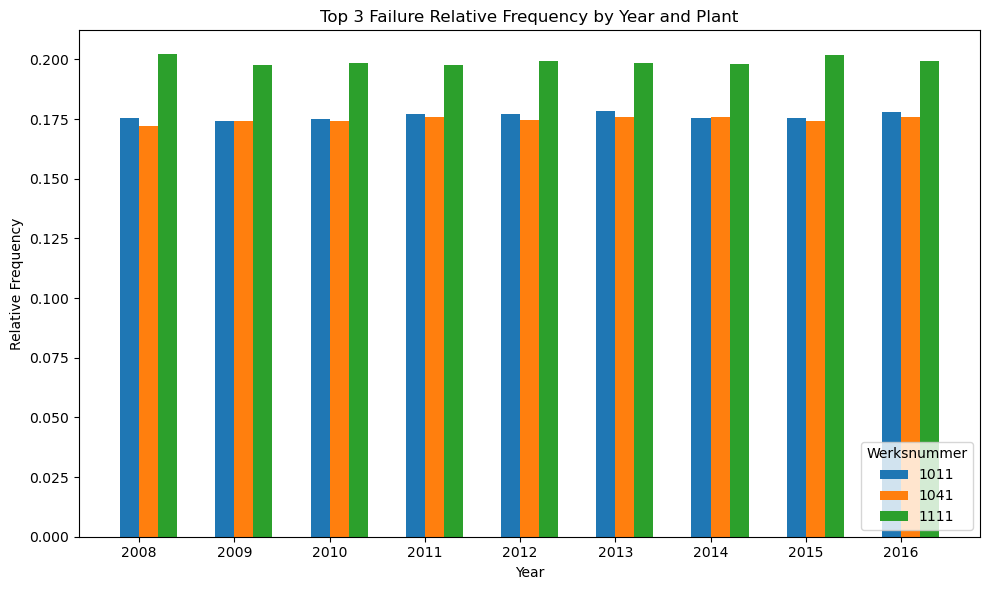

In [258]:
# create a bar chart that shows annual top 3 plants with the highest 
# defect relative frequency

# prepare the data for the chart
rel_frq_grouped = plant_list_rel_freq.loc[:,['year',
                                             'werksnummer',
                                             'relative_freq']]
rel_frq_grouped_sorted = rel_frq_grouped.sort_values(
                         by=['year',
                             'relative_freq'],
                             ascending=[True, False]).groupby('year')
rel_frq_grouped_sorted_top = rel_frq_grouped_sorted.head(3).reset_index(
    drop=True)
rel_frq_grouped_sorted_top_pivot = rel_frq_grouped_sorted_top.pivot(
                                                  index='year',
                                                  columns='werksnummer', 
                                                  values='relative_freq')
# define the bars
bar_width = 0.2
years = rel_frq_grouped_sorted_top_pivot.index
werksnummer = rel_frq_grouped_sorted_top_pivot.columns
                                                                         
# create bar positions
bar_pos = [
    np.arange(len(years)) + i * bar_width for i in range(len(
                                werksnummer))]
# plotting each plant
plt.figure(figsize=(10,6))
for i, werksnummer in enumerate(werksnummer):
    plt.bar(bar_pos[i], rel_frq_grouped_sorted_top_pivot[werksnummer], 
            width=bar_width, label=werksnummer)
# Add labels and title
plt.xlabel('Year')
plt.ylabel('Relative Frequency')
plt.title('Top 3 Failure Relative Frequency by Year and Plant')
plt.xticks([r + bar_width / 2 for r in range(len(years))], 
           years) # type: ignore
plt.legend(title='Werksnummer', loc='lower right')
plt.tight_layout()
plt.show()

## 4.1.2 P-Chart Results

The P-Chart plots show the relative frequency of defective components, with the addition of the control limit curves above and below the relative frequency values. This provides information of whether the production process is still within its tolerance limits. A relative frequency curve that moves beyond the upper and lower control limits indicate potential problems that may arise if no inspection is carried out. Another possible reason is the presence of outliers due to external factors such as delays the delivery of parts that make up the components, resulting in the production not meeting the target.

Anyway, in this study, the P-charts results indicate no deviation in the relative frequency beyond the control limits. However, some factories exhibit potentials of going beyond the control limits such as factory 1021, 1101, and 1131 in 2014, and factory 1111 in 2015. The relative frequencies however, have returned back to the mean values in the next year, indicating the potential problems that may lead to increase in the volumes of defective components have been rectified.

Therefore, it is safe to say that the productions in the supplier factories are still within control tolerances.



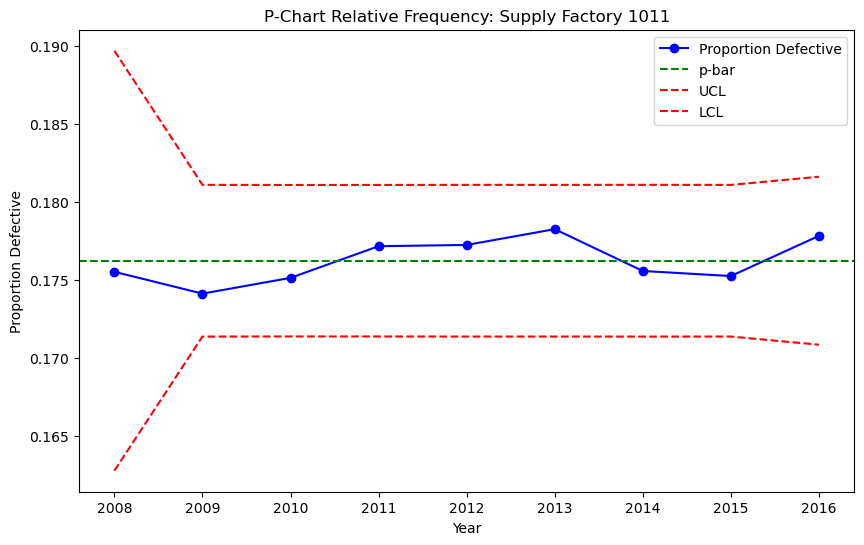

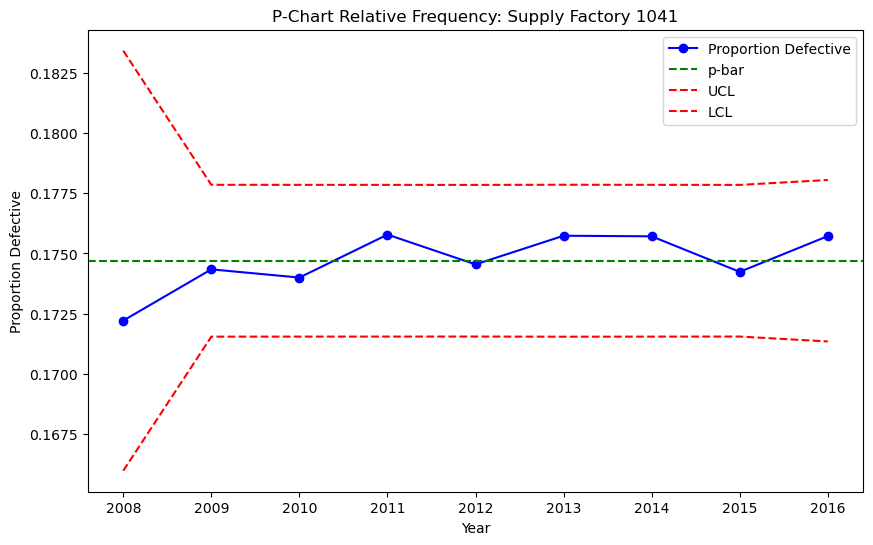

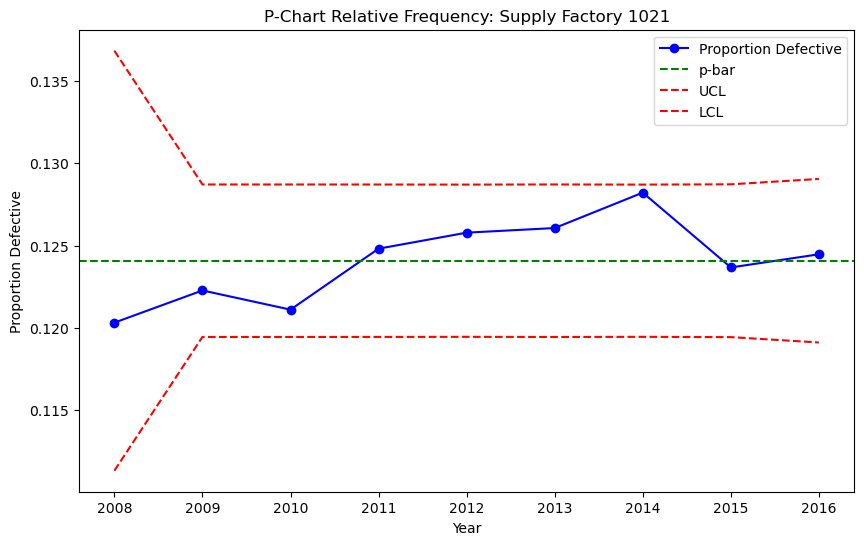

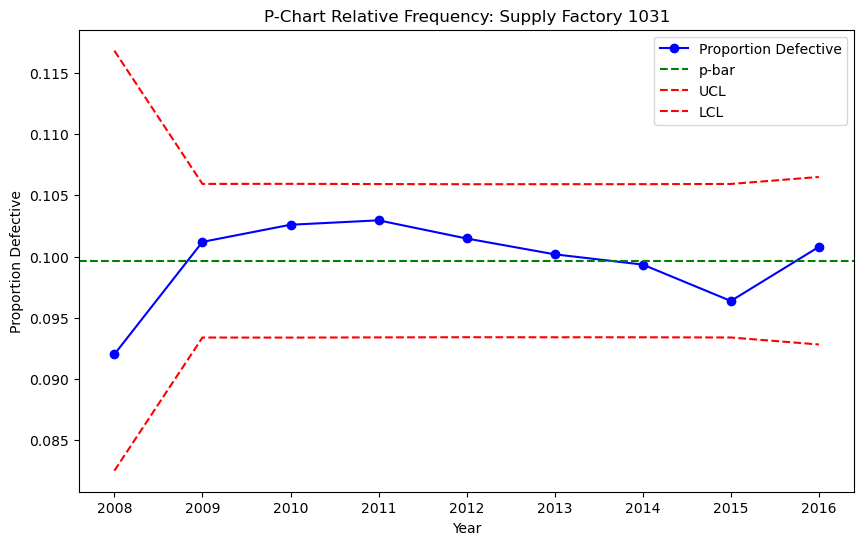

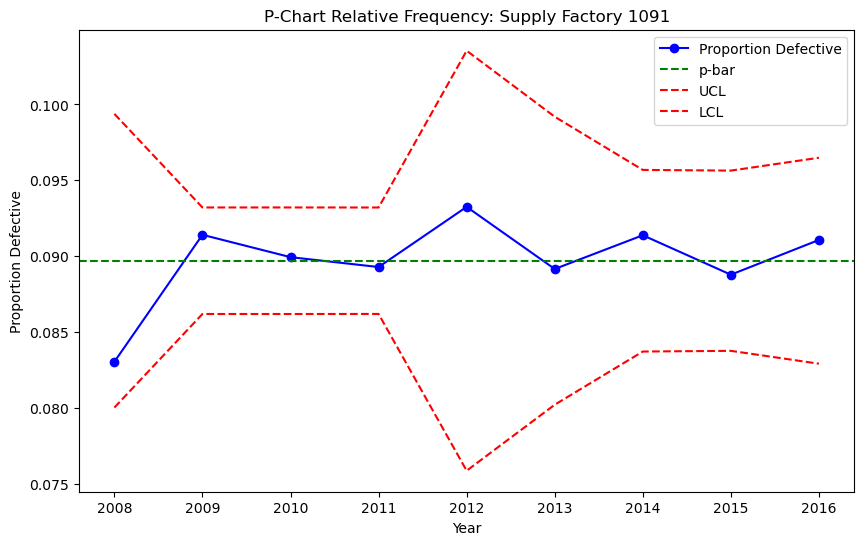

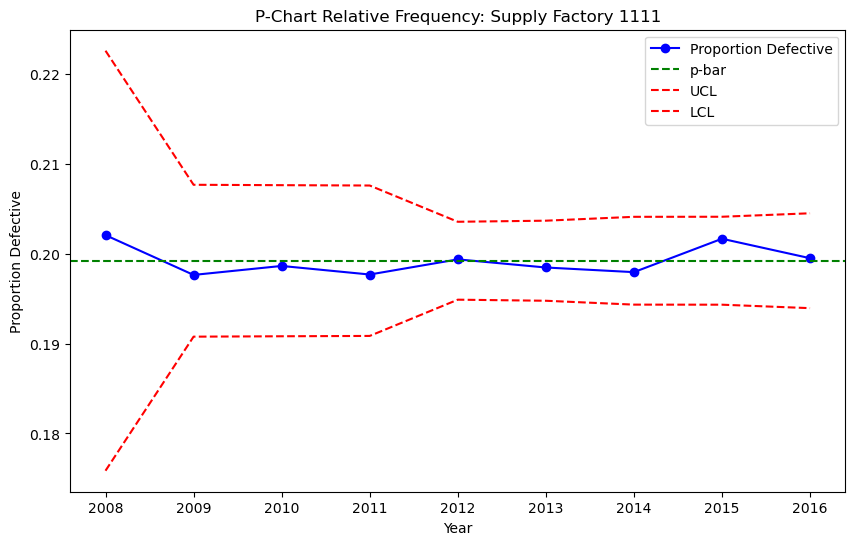

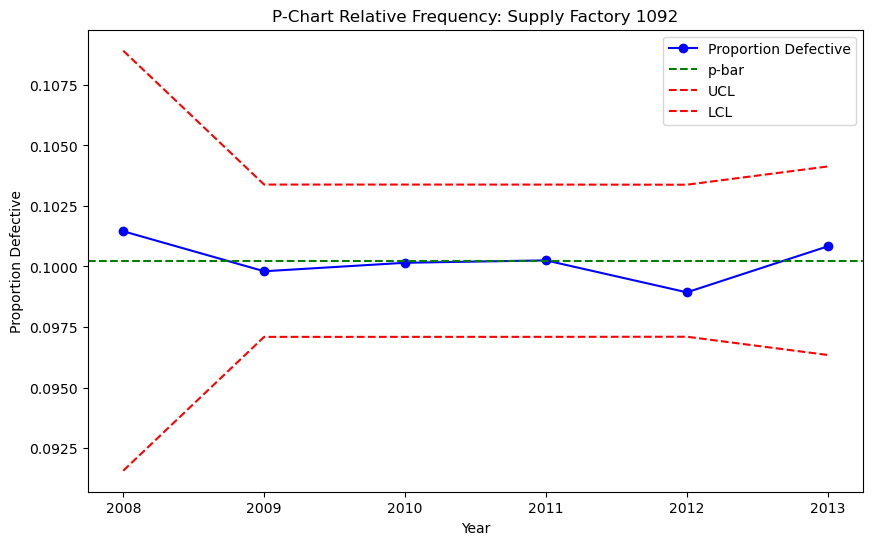

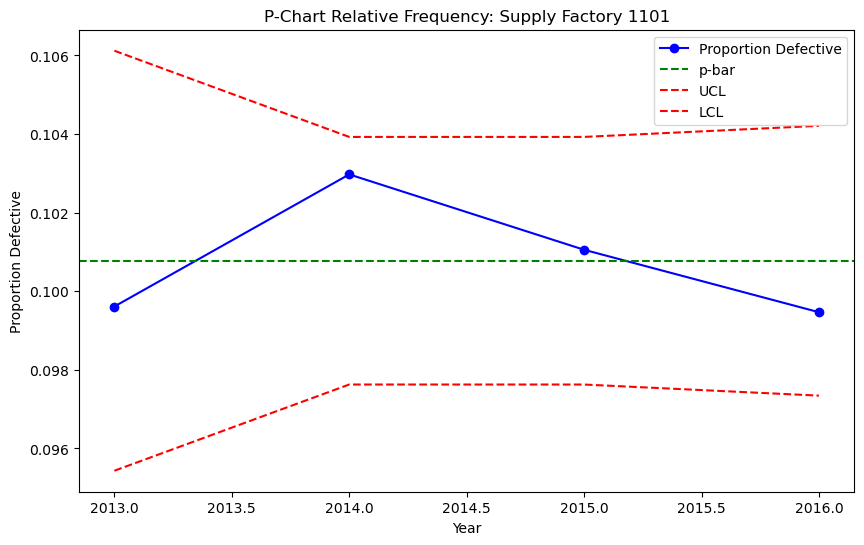

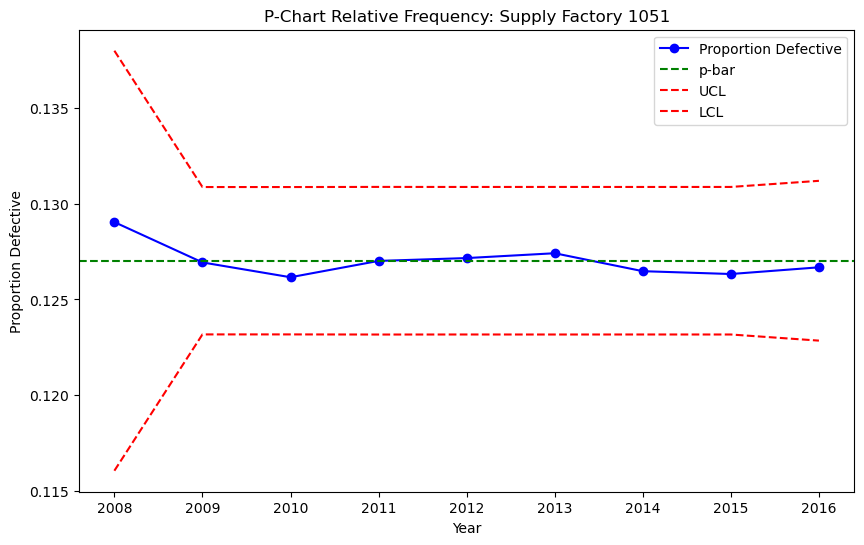

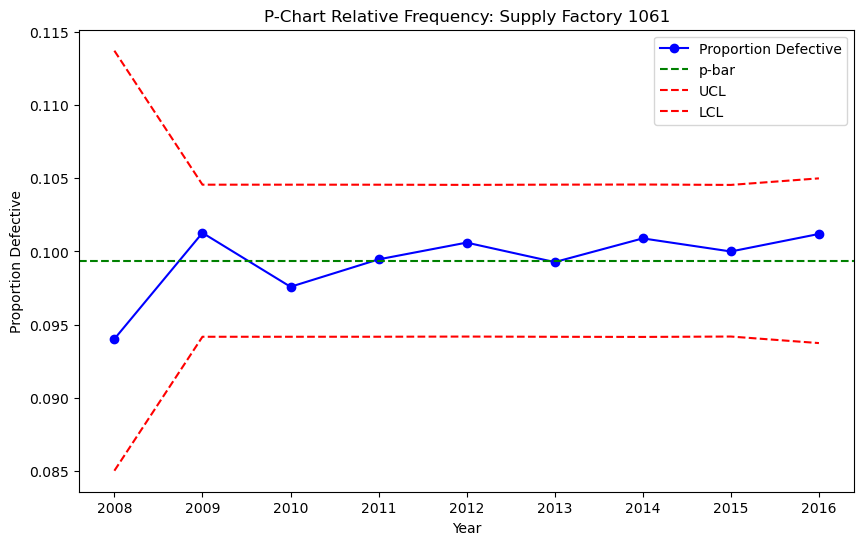

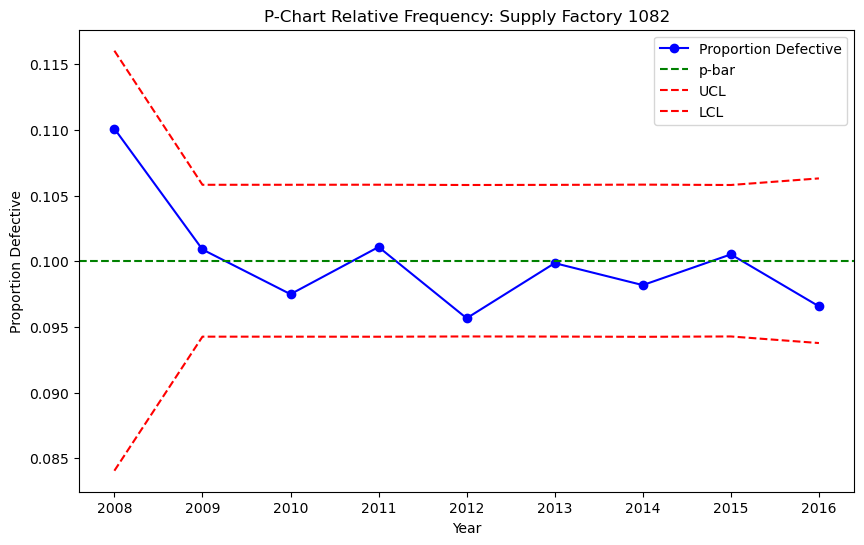

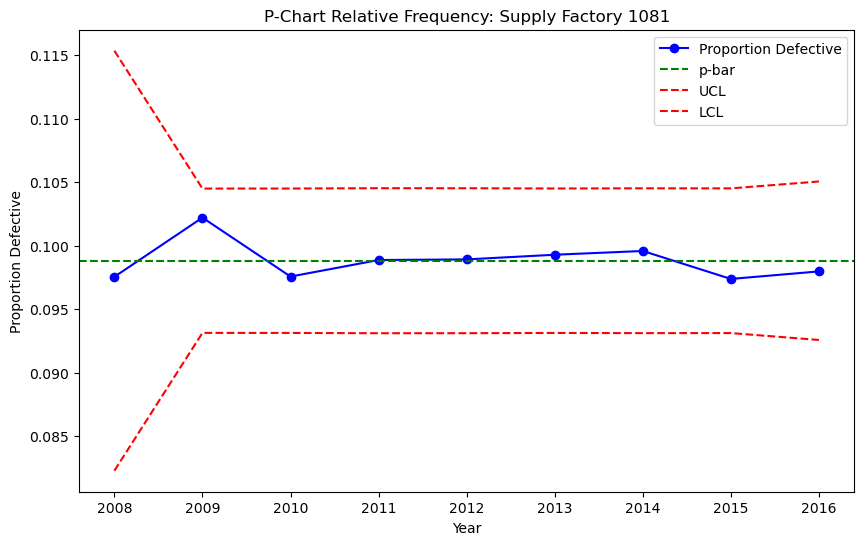

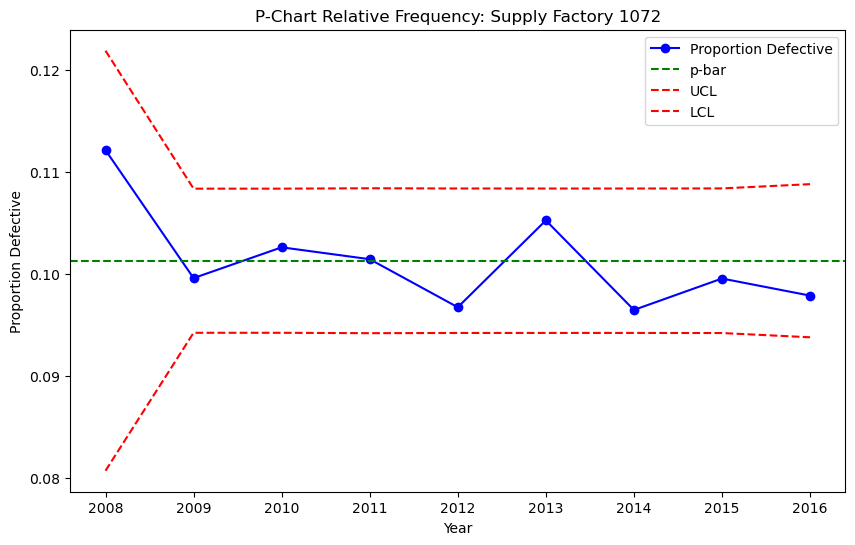

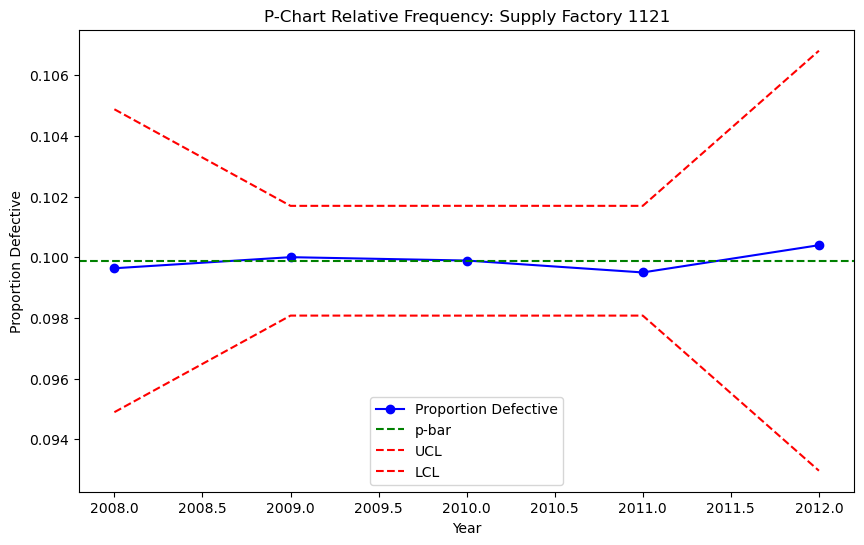

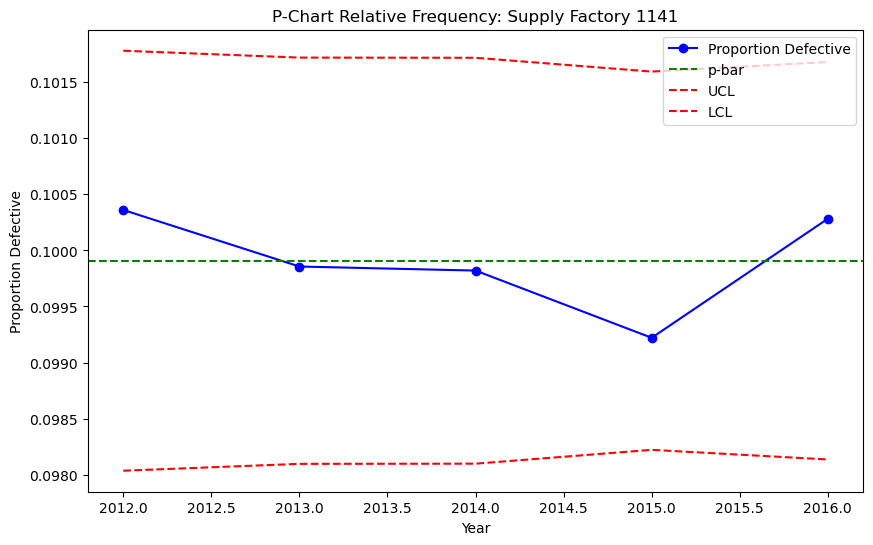

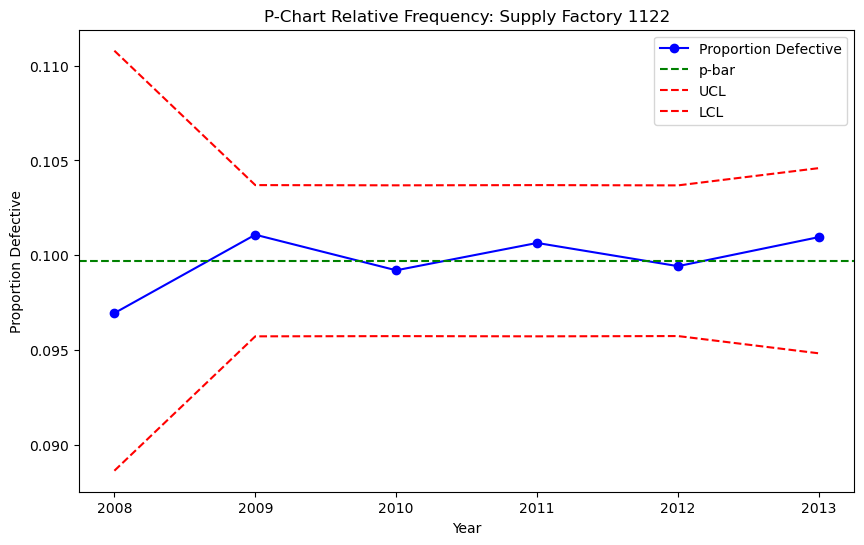

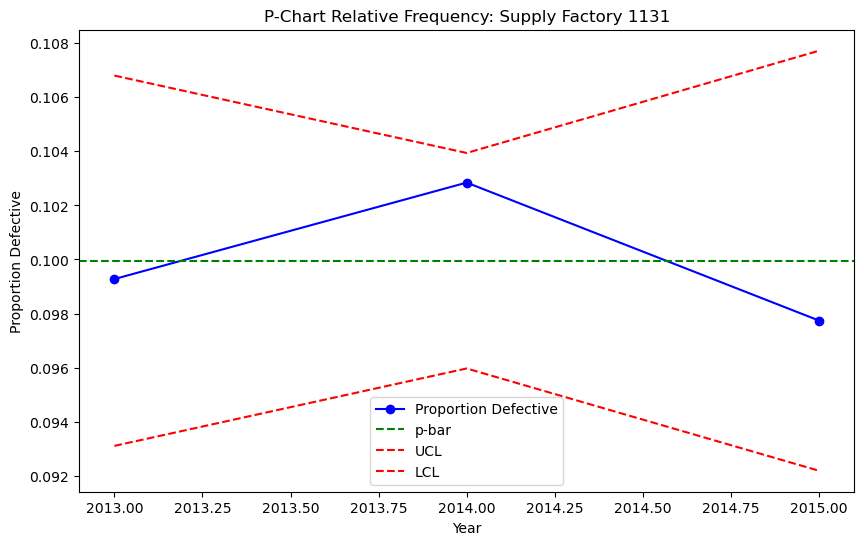

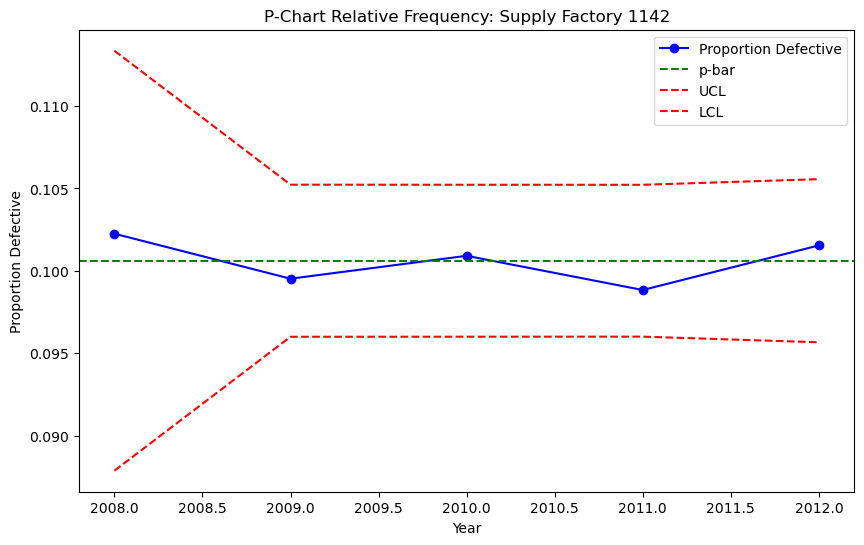

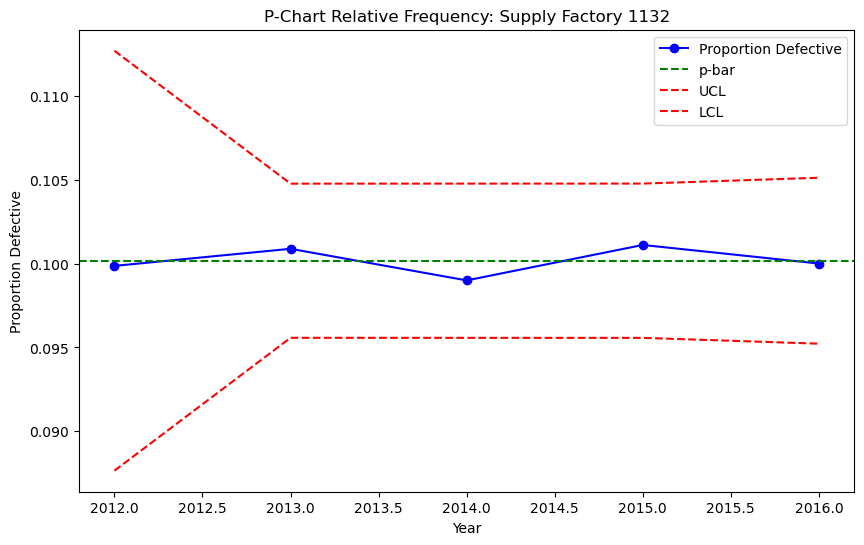

In [259]:
def plot_pchart(plant_no, plant_control_limit, plant_list):
    plt.figure(figsize=(10, 6))
    plt.plot(plant_no['year'], plant_control_limit['p'], marker='o', 
             linestyle='-', color='blue', label='Proportion Defective')
    plt.axhline(y=plant_control_limit['p'].mean(), 
                color='green', linestyle='--', label='p-bar')
    plt.plot(plant_no['year'], plant_control_limit['ucl'], color='red', 
             linestyle='--', label='UCL')
    plt.plot(plant_no['year'], plant_control_limit['lcl'], color='red', 
             linestyle='--', label='LCL')

    plt.title('P-Chart Relative Frequency: Supply Factory ' + str(plant_list))
    plt.xlabel('Year')
    plt.ylabel('Proportion Defective')
    plt.legend()
    plt.show()
    return

for i in range(len(plant)):
    plot_pchart(plant[i], plant_control_limit[i], plant_list[i])

### 4.1.3 Pareto Analysis Results

The results of the Pareto Analysis is plotted using the code snippet below. The resulting Pareto chart is also visible. The Pareto chart tells a different story. In the relative frequency chart, the factory that has the most defects per total production volume is factory 1111. However, in the Pareto chart, the factories that contribute to the dominant defects in components production are located on the left of vertical line that marks the cumulative percentage intersection with the 80th percentile.

This means that the factories that contribute to the 80% of defective components production are the factories with the following codes:
- 1041
- 1141
- 1121
- 1011
- 1111
- 1051
- 1021
- 1092

with factory 1041 contributes the highest volumes of defective components. According to the Pareto analysis, if the defective components production problem is to be addressed, then we should start with the factories on the left of the vertical line, with the highest priority given to factory 1041 as the greatest contributor. Let us check the top three factories to see the defect relative frequency of the components produced in these factories. 

Based on the query made in the code snippet below, factory 1041 produces K1BE1 and K1BE2, which is the engine. The defect relative frequency for engine component K1BE1 is 0.438, which means for 100 engines produced during the analysis period, 43 - 44 engines are defects. Other factories 1141 and 1121 produce car body components K4 and K5. The relative frequencies for these two components are less than 1, which is 10% of the total production volumes.

This leaves the engine K1BE1 as the main contributor of the defective components produced between 2008 and 2016. Other than factory 1041, there are two other factories that produce the K1BE1 component, namely 1011 and 1021. In these two factories, both relative frequencies are 0.176, which is still higher than most of the other components. Based in this fact alone, further actions are required to address the problems with the engine component K1BE1, as this indicates the problem lies within the component, not the supplier factories.

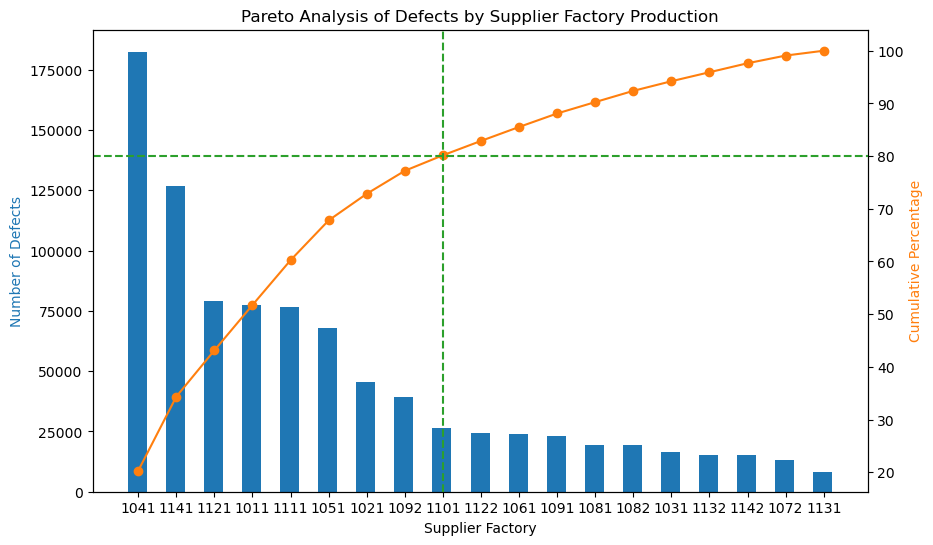

In [265]:
# create a pareto chart to see which plants contribute the most to the
# defective components volume
fig, ax1 = plt.subplots(figsize=(10,6))
bar_width = 0.5  # Adjust the bar width (less than 1 for spacing)
x = range(len(pareto['werksnummer']))  # positions of bars  
# adjusting positions of bars
bar_positions = [i - (bar_width / 20) for i in x]

# Bar chart for defects with adjusted bar positions
ax1.bar(bar_positions, pareto['defect_volume'], width=bar_width, 
        color='C0')

# ax1.bar(df['werksnummer'], df['defect_volume'], color='C0')
ax1.set_xlabel('Supplier Factory')
ax1.set_ylabel('Number of Defects', color='C0')

# Line chart for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(pareto['werksnummer'], pareto['cumulative_percentage'], 
         color='C1', marker='o')
ax2.set_ylabel('Cumulative Percentage', color='C1')

# Adding a horizontal line for the 80% mark
ax2.axhline(80, color='C2', linestyle='--')

# Find the point where cumulative percentage crosses 80%
crossover_index = next(i for i, 
                       value in enumerate(
                           pareto['cumulative_percentage']) if value >= 80)
crossover_werksnummer = pareto['werksnummer'][crossover_index]

# Adding a vertical line at the crossover point
ax2.axvline(x=crossover_werksnummer, color='C2', linestyle='--')

plt.title('Pareto Analysis of Defects by Supplier Factory Production')
plt.show()

Check for components in Factory 1041

In [268]:
# check for components produced in plant1041
print('Components produced by Factory 1041:')
print(komponente_all[komponente_all['Werksnummer'] 
                     == 1041]['Komp_Name'].unique())

# check for K1BE1
print('Number of components produced for K1BE1:')
print(komponente_all[(komponente_all['Werksnummer'] == 1041) 
                     & (komponente_all['Komp_Name'] == 'K1BE1')].shape[0])

print('Number of defective components produced for K1BE1:')
print(komponente_all[(komponente_all['Werksnummer'] == 1041) 
                     & (komponente_all['Komp_Name'] == 'K1BE1')
                     & (komponente_all['Fehlerhaft'] == 1)].shape[0])

print('Defect relative frequency for K1BE1:')
print((komponente_all[(komponente_all['Werksnummer'] == 1041) 
                     & (komponente_all['Komp_Name'] == 'K1BE1')
                     & (komponente_all['Fehlerhaft'] == 1)].shape[0]) 
                     / (komponente_all[(komponente_all['Werksnummer'] == 1111) 
                     & (komponente_all['Komp_Name'] == 'K2LE1')].shape[0]))

# check for K1BE2
print('Number of components produced for K1BE2:')
print(komponente_all[(komponente_all['Werksnummer'] == 1041) & 
                     (komponente_all['Komp_Name'] == 'K1BE2')].shape[0])

print('Number of defective components produced for K1BE2:')
print(komponente_all[(komponente_all['Werksnummer'] == 1041) 
                     & (komponente_all['Komp_Name'] == 'K1BE2')
                     & (komponente_all['Fehlerhaft'] == 1)].shape[0])

print('Defect relative frequency for K1BE2:')
print((komponente_all[(komponente_all['Werksnummer'] == 1041) 
                     & (komponente_all['Komp_Name'] == 'K1BE2')
                     & (komponente_all['Fehlerhaft'] == 1)].shape[0]) 
                     / (komponente_all[(komponente_all['Werksnummer'] == 1041) 
                     & (komponente_all['Komp_Name'] == 'K1BE2')].shape[0]))

Components produced by Factory 1041:
['K1BE1' 'K1BE2']
Number of components produced for K1BE1:
715578
Number of defective components produced for K1BE1:
125266
Defect relative frequency for K1BE1:
0.4376379999441013
Number of components produced for K1BE2:
327538
Number of defective components produced for K1BE2:
57230
Defect relative frequency for K1BE2:
0.17472781784098335


Check for other plants that produces engine K1BE1

In [286]:
# check for other plants that produce components K1BE1
print(komponente_all[komponente_all['Komp_Name'] 
                     == 'K1BE1']['Werksnummer'].unique())

# check for K1BE1 in plant 1011
print('Number of K1BE1 components produced in plant 1011:')
print(komponente_all[(komponente_all['Werksnummer'] == 1011) 
                     & (komponente_all['Komp_Name'] == 'K1BE1')].shape[0])

print('Number of defective K1BE1 components produced in plant 1011:')
print(komponente_all[(komponente_all['Werksnummer'] == 1011) 
                     & (komponente_all['Komp_Name'] == 'K1BE1')
                     & (komponente_all['Fehlerhaft'] == 1)].shape[0])

print('Defect relative frequency for K1BE1 in plant 1011:')
print((komponente_all[(komponente_all['Werksnummer'] == 1011) 
                     & (komponente_all['Komp_Name'] == 'K1BE1')
                     & (komponente_all['Fehlerhaft'] == 1)].shape[0])
                     / (komponente_all[(komponente_all['Werksnummer'] == 1011) 
                     & (komponente_all['Komp_Name'] == 'K1BE1')].shape[0]))

# check for K1BE1 in plant 1021
print('Number of K1BE1 components produced in plant 1021:')
print(komponente_all[(komponente_all['Werksnummer'] == 1021) 
                     & (komponente_all['Komp_Name'] == 'K1BE1')].shape[0])

print('Number of defective K1BE1 components produced in plant 1021:')
print(komponente_all[(komponente_all['Werksnummer'] == 1021) 
                     & (komponente_all['Komp_Name'] == 'K1BE1')
                     & (komponente_all['Fehlerhaft'] == 1)].shape[0])

print('Defect relative frequency for K1BE1 in plant 1021:')
print((komponente_all[(komponente_all['Werksnummer'] == 1021) 
                     & (komponente_all['Komp_Name'] == 'K1BE1')
                     & (komponente_all['Fehlerhaft'] == 1)].shape[0])
                     / (komponente_all[(komponente_all['Werksnummer'] == 1021) 
                     & (komponente_all['Komp_Name'] == 'K1BE1')].shape[0]))

[1011 1041 1021]
Number of K1BE1 components produced in plant 1011:
357789
Number of defective K1BE1 components produced in plant 1011:
62954
Defect relative frequency for K1BE1 in plant 1011:
0.17595286607469765
Number of K1BE1 components produced in plant 1021:
119263
Number of defective K1BE1 components produced in plant 1021:
20976
Defect relative frequency for K1BE1 in plant 1021:
0.1758801975465987


Check for components in Factory 1141

In [272]:
# check for components produced in plant1141
print('Components produced by Factory 1141:')
print(komponente_all[komponente_all['Werksnummer'] 
                     == 1141]['Komp_Name'].unique())

# check for K4
print('Number of components produced for K4:')
print(komponente_all[(komponente_all['Werksnummer'] == 1141) 
                     & (komponente_all['Komp_Name'] == 'K4')].shape[0])

print('Number of defective components produced for K4:')
print(komponente_all[(komponente_all['Werksnummer'] == 1141) 
                     & (komponente_all['Komp_Name'] == 'K4')
                     & (komponente_all['Fehlerhaft'] == 1)].shape[0])

print('Defect relative frequency for K4:')
print((komponente_all[(komponente_all['Werksnummer'] == 1141) 
                     & (komponente_all['Komp_Name'] == 'K4')
                     & (komponente_all['Fehlerhaft'] == 1)].shape[0]) 
                     / (komponente_all[(komponente_all['Werksnummer'] == 1141) 
                     & (komponente_all['Komp_Name'] == 'K4')].shape[0]))

# check for K5
print('Number of components produced for K5:')
print(komponente_all[(komponente_all['Werksnummer'] == 1141) & 
                     (komponente_all['Komp_Name'] == 'K5')].shape[0])

print('Number of defective components produced for K5:')
print(komponente_all[(komponente_all['Werksnummer'] == 1141) 
                     & (komponente_all['Komp_Name'] == 'K5')
                     & (komponente_all['Fehlerhaft'] == 1)].shape[0])

print('Defect relative frequency for K5:')
print((komponente_all[(komponente_all['Werksnummer'] == 1141) 
                     & (komponente_all['Komp_Name'] == 'K5')
                     & (komponente_all['Fehlerhaft'] == 1)].shape[0]) 
                     / (komponente_all[(komponente_all['Werksnummer'] == 1141) & 
                     (komponente_all['Komp_Name'] == 'K5')].shape[0]))

Components produced by Factory 1141:
['K4' 'K5']
Number of components produced for K4:
1186299
Number of defective components produced for K4:
118602
Defect relative frequency for K4:
0.09997648147726669
Number of components produced for K5:
81620
Number of defective components produced for K5:
8044
Defect relative frequency for K5:
0.09855427591276648


Check for components in Factory 1121

In [275]:
# check for components produced in plant1041
print('Components produced by Factory 1121:')
print(komponente_all[komponente_all['Werksnummer'] 
                     == 1121]['Komp_Name'].unique())

# check for K4
print('Number of components produced for K4:')
print(komponente_all[(komponente_all['Werksnummer'] == 1121) 
                     & (komponente_all['Komp_Name'] == 'K4')].shape[0])

print('Number of defective components produced for K4:')
print(komponente_all[(komponente_all['Werksnummer'] == 1121) 
                     & (komponente_all['Komp_Name'] == 'K4')
                     & (komponente_all['Fehlerhaft'] == 1)].shape[0])

print('Defect relative frequency for K4:')
print((komponente_all[(komponente_all['Werksnummer'] == 1121) 
                     & (komponente_all['Komp_Name'] == 'K4')
                     & (komponente_all['Fehlerhaft'] == 1)].shape[0]) 
                     / (komponente_all[(komponente_all['Werksnummer'] == 1121) 
                     & (komponente_all['Komp_Name'] == 'K4')].shape[0]))

Components produced by Factory 1121:
['K4']
Number of components produced for K4:
790865
Number of defective components produced for K4:
78931
Defect relative frequency for K4:
0.09980337984358899


## 4.2 Conclusions
To conclude this study, it is found that the problems need to be addressed may lie in the engine component K1BE1. This means that inspections and audit may be carried out on the said engine. While the supplier factories may have contributed in the production of the defective engines, the chart shows that the components produced are still within the production tolerances. 

Feedback to the suplliers with factories that are on the left of the Pareto chart may be provided to improve the production lines so that the number of defective components produced may be reduced.

# Appendix: Dash Application

In [ ]:
#dash app
# Initialize the Dash app
app = dash.Dash(__name__)
# Layout of the Dash app
app.layout = html.Div([
    html.H1("P-Chart and Relative Frequency Dashboard"),

    # Dropdown for selecting plant
    dcc.Dropdown(
        id='plant-dropdown',
        options=[{'label': plant, 'value': ID} for ID, 
                 plant in enumerate(plant_list)],
                 value=0,
        clearable=False
    ),
    
    # Graph for P-Chart
    dcc.Graph(id='p-chart'),
    
    # Dropdown for selecting plant for line chart
    dcc.Dropdown(
        id='line-plant-dropdown',
        options=[{'label': plant, 'value': ID} for ID, 
                 plant in enumerate(plant_list)],
                 value=0,
        clearable=False
    ),
    
    # Graph for line chart
    dcc.Graph(id='line-chart'),
])

# Callback to update P-Chart based on selected plant
@app.callback(
    Output('p-chart', 'figure'),
    [Input('plant-dropdown', 'value')]
)
def update_p_chart(selected_plant):
    plant_data = plant[selected_plant]
    control_limits = plant_control_limit[selected_plant]
    
    fig = go.Figure()
    
    # Adding the proportion defective line
    fig.add_trace(
        go.Scatter(x=plant_data['year'], y=control_limits['p'],
                             mode='lines+markers', 
                             name='Proportion Defective', 
                             line=dict(color='blue')))
    
    # Adding the p-bar line
    fig.add_trace(
        go.Scatter(x=plant_data['year'], 
                   y=[control_limits['p'].mean()] * len(plant_data),
                   mode='lines', name='p-bar', 
                   line=dict(color='green', dash='dash')))
    
    # Adding UCL and LCL
    fig.add_trace(
        go.Scatter(x=plant_data['year'], 
                             y=control_limits['ucl'],
                             mode='lines', name='UCL', 
                             line=dict(color='red', dash='dash')))
    
    fig.add_trace(
        go.Scatter(x=plant_data['year'], 
                             y=control_limits['lcl'],
                             mode='lines', name='LCL', 
                             line=dict(color='red', dash='dash')))
    
    fig.update_layout(title=f'P-Chart Relative Frequency: {
                                    plant_list[selected_plant]}',
                                    xaxis_title='Year',
                                    yaxis_title='Proportion Defective')
    return fig
# Callback to update line chart based on selected plant and year
@app.callback(
    Output('line-chart', 'figure'),
    [Input('line-plant-dropdown', 'value')]
)
def update_line_chart(selected_plant):
    fig = go.Figure()
    
    for i in range(len(plant)):
        fig.add_trace(go.Scatter(x=plant[i]['year'], 
                                 y=plant[i]['relative_freq_percentage'],
                                 mode='lines+markers', 
                                 name=f"{plant[i][
                                     'werksnummer'].iloc[0]}"))
    
    fig.update_layout(title='Relative Frequency Plot for All Plants',
                      xaxis_title='Year',
                      yaxis_title='Relative Frequency (%)')
    
    return 

if __name__ == '__main__':
    app.run_server(debug=True)
import os
os.getcwd()